In [1]:
import numpy as np
import pandas as pd 
import nltk as tk
import re 
from nltk.corpus import stopwords
import emoji
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.lm.preprocessing import pad_both_ends

C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Vision\.conda\envs\Tensor\lib\site-packages\tensorflow\python\frame

# Read data

In [2]:
data=pd.read_csv('Covid_19_tweets_train.csv',encoding="latin1")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# drop columns not importants

In [3]:
data_important=data.drop(columns=['TweetAt', 'UserName', 'ScreenName', 'TweetAt'], axis=1)
data_important.head()

,Location,OriginalTweet,Sentiment
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,My food stock is not the only one which is emp...,Positive
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [162]:
stop_words=stopwords.words('english')
def cleaning_data(tweet):
    tweet=tweet.lower()
    tweet = str(' '.join(re.sub(r"([^A-Za-z _#@])|([٠١٢٣٤٥٦٧٨٩]+)|([0-9]+)|\_+||(\/)+|(\:)+", "", tweet).split()))
    exp=re.compile(r'http\S+')
    tweet=re.sub(exp,"",tweet)
#     flagsUs = re.compile("["
#                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                          "]+", flags=re.UNICODE)
#     dirtyChars = re.compile("["
#                             "\u0600-\u0620"
#                             "\u063B-\u0640"
#                             "\u064B-\u065F"
#                             "\u066A-\u06FF"
#                             "\u0750-\u077F"
#                             "\u08A0-\u08FF"
#                             "\uFB50-\uFBE9"
#                             "\uFBF0-\uFBFB"
#                             "\uFC5B-\uFC63"
#                             "\uFCF2-\uFCF4"
#                             "\uFD3C-\uFD4F"
#                             "\uFD90-\uFD91"
#                             "\uFDC8-\uFDFF"
#                             "\uFE70-\uFE7F"
#                             "\uFEFD-\uFEFF"
#                             "]+", flags=re.UNICODE)
#     tweet = str(re.sub(flagsUs, '', tweet))
#     tweet = str(re.sub(dirtyChars, '', tweet))
    tweet = re.sub(
        '\/+|\●+|\◽+|\٪+|\▪+|\»+|\«+|\_+|\ʚïɞ+|\▐+|\►+|\"+|\*+|\》+|\《+|\[+|\Ещё+|\]+|\|+|\;+|\'+|\<+|\>+|\\+|\`+|\{+|\}+|\~+|\"+|\-+|\:+|\@\S+|\$+|\ﷺ+|\%+|\^+|\&+|\(+|\)+|\.+|\,+|\?+|\=+|\++|\؛+\“+|\”+',
        ' ', tweet)
#     tweet = re.sub(r'([\u0600-\u06FF])', '', tweet)
#     tweet = re.sub(r'[\u2066]', '', tweet)
#     tweet = re.sub(r'[\u2069]', '', tweet)
#     tweet = re.sub(r'[\uFE0F]', '', tweet)
#     tweet = re.sub(r'[\u25a0]', '', tweet)
#     tweet = re.sub(r'[\u2022]', '', tweet)
#     tweet = re.sub(r'[\u2592]', '', tweet)
#     twwet=re.sub(r'([\w])\1+','\1',tweet)
#     tweet = re.sub('[\u1ea0]|[\u1ea1]|[\u1e97]|[\u1ea1]|[\u02bf]|[\u1e97]|[\u1ea1]|[\u1e97]|[\u1ea1]|[\u1ea1]|[\u02be]|[\u1ea1]|[\u1ea1]',' ',tweet)
    tweet = ' '.join([word for word in tweet.lower().split() if word not in stop_words and len(word)>1])
    tweet=tweet.lower()
    
    return tweet
    

In [163]:
data_important['tweet cleaning']=data_important['OriginalTweet'].apply(cleaning_data)
data_important['tweet cleaning'].head()

0                                                     
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock one emptyplease dont panic enough f...
4    ready go supermarket #covid outbreaknot im par...
Name: tweet cleaning, dtype: object

In [170]:
# from nltk.tokenize import RegexpTokenizer
wnl = tk.WordNetLemmatizer()
porter = tk.PorterStemmer()
# import time
# tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
def Normalizng_data(tweet):
    #steaming
    
    
    
    tokens=tokenizer.tokenize(tweet)
    
    tweet=" ".join([porter.stem(t) for t in tweet.split()])
    
    #Limitazation
    tokens=tokenizer.tokenize(tweet)
    
    lemmatizedTokens =[wnl.lemmatize(t) for t in tweet.split()]
    tweet=" ".join(lemmatizedTokens)
    return tweet 
st=time.time()
data_important['tweet cleaning and normalizing']=data_important['tweet cleaning'].apply(Normalizng_data)
data_important


,Location,OriginalTweet,Sentiment,tweet cleaning,tweet cleaning and normalizing
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,
1,UK,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...
3,NaN,My food stock is not the only one which is emp...,Positive,food stock one emptyplease dont panic enough f...,food stock one emptypleas dont panic enough fo...
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreaknot im par...,readi go supermarket #covid outbreaknot im par...
...,...,...,...,...,...
41152,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering stock supermarket shel...,airlin pilot offer stock supermarket shelv #nz...
41153,NaN,Response to complaint not provided citing COVI...,Extremely Negative,response complaint provided citing covid relat...,respons complaint provid cite covid relat dela...
41154,NaN,You know itÂs getting tough when @KameronWild...,Positive,know getting tough rationing toilet paper #cor...,know get tough ration toilet paper #coronaviru...
41155,NaN,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn on#co...,wrong smell hand sanit start turn on#coronavir...


In [166]:
data_important

,Location,OriginalTweet,Sentiment,tweet cleaning,tweet cleaning and normalizing
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,
1,UK,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...
3,NaN,My food stock is not the only one which is emp...,Positive,food stock one emptyplease dont panic enough f...,food stock one emptypleas dont panic enough fo...
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreaknot im par...,readi go supermarket #covid outbreaknot im par...
...,...,...,...,...,...
41152,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering stock supermarket shel...,airlin pilot offer stock supermarket shelv #nz...
41153,NaN,Response to complaint not provided citing COVI...,Extremely Negative,response complaint provided citing covid relat...,respons complaint provid cite covid relat dela...
41154,NaN,You know itÂs getting tough when @KameronWild...,Positive,know getting tough rationing toilet paper #cor...,know get tough ration toilet paper #coronaviru...
41155,NaN,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn on#co...,wrong smell hand sanit start turn on #coronavi...


# Vocabilary

In [172]:
toknize=Tokenizer()
toknize.fit_on_texts(data_important['tweet cleaning and normalizing'])
print(len(toknize.word_index))
Vocabilary=[k for k,v in toknize.word_index.items()]

43380


# all words

In [174]:
allwords=[]
for tweet in data_important['tweet cleaning']:
    for word in tweet.split():
            print(tweet)
        allwords.append(word)
len(allwords)

713190

# most common word

In [175]:
all_words_freq =tk.FreqDist(allwords)
all_words_freq.most_common(30)

[('#coronavirus', 14549),
 ('#covid', 10218),
 ('covid', 10214),
 ('prices', 7619),
 ('food', 6661),
 ('store', 6638),
 ('supermarket', 6525),
 ('grocery', 6001),
 ('people', 5380),
 ('amp', 4949),
 ('consumer', 4223),
 ('shopping', 3309),
 ('online', 3278),
 ('get', 2853),
 ('need', 2674),
 ('pandemic', 2573),
 ('us', 2539),
 ('workers', 2514),
 ('panic', 2373),
 ('like', 2331),
 ('time', 2241),
 ('go', 2235),
 ('demand', 2197),
 ('home', 2134),
 ('help', 2074),
 ('sanitizer', 2047),
 ('coronavirus', 2038),
 ('hand', 2036),
 ('going', 1938),
 ('stock', 1919)]

# Habaxes

In [178]:
Habaxes=all_words_freq.hapaxes()[:100]

# Remove Habaxes from data

In [191]:
def remove_hapaxes(tweet):
    tweet=" ".join([word for word in tweet.split() if word not in  Habaxes])
    return tweet
data_important['tweet cleaning and normalizing whithout Habaxes']=data_important['tweet cleaning and normalizing'].apply(remove_hapaxes)
data_important

,Location,OriginalTweet,Sentiment,tweet cleaning,tweet cleaning and normalizing,tweet cleaning and normalizing whithout Habaxes
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,,
1,UK,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...,advic talk neighbour famili exchang phone numb...
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...,coronaviru australia woolworth give elderli di...
3,NaN,My food stock is not the only one which is emp...,Positive,food stock one emptyplease dont panic enough f...,food stock one emptypleas dont panic enough fo...,food stock one emptypleas dont panic enough fo...
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreaknot im par...,readi go supermarket #covid outbreaknot im par...,readi go supermarket #covid im paranoid food s...
...,...,...,...,...,...,...
41152,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering stock supermarket shel...,airlin pilot offer stock supermarket shelv #nz...,airlin pilot offer stock supermarket shelv #nz...
41153,NaN,Response to complaint not provided citing COVI...,Extremely Negative,response complaint provided citing covid relat...,respons complaint provid cite covid relat dela...,respons complaint provid cite covid relat dela...
41154,NaN,You know itÂs getting tough when @KameronWild...,Positive,know getting tough rationing toilet paper #cor...,know get tough ration toilet paper #coronaviru...,know get tough ration toilet paper #coronaviru...
41155,NaN,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smell hand sanitizer starting turn on#co...,wrong smell hand sanit start turn on#coronavir...,wrong smell hand sanit start turn on#coronavir...


# n gram n=2

In [192]:
bigrams_words=bigrams(pad_both_ends(" ".join(data_important['tweet cleaning']).split(), n=2))
bigram_words=list(bigrams_words)

# most bigram words

In [193]:
most=tk.FreqDist(bigram_words)
most.most_common(10)

[(('grocery', 'store'), 4552),
 (('#coronavirus', '#covid'), 1792),
 (('#covid', '#coronavirus'), 1581),
 (('hand', 'sanitizer'), 1442),
 (('online', 'shopping'), 1276),
 (('toilet', 'paper'), 1164),
 (('panic', 'buying'), 1030),
 (('covid', 'pandemic'), 872),
 (('oil', 'prices'), 859),
 (('#covid', '#covid'), 682)]

# most common hashtags

In [196]:
expforhashtag=re.compile(r'#\S+')


Object `re.findall()` not found.


In [202]:
def get_hashtags(tweet):
    hashtags=re.findall(expforhashtag,tweet)
    return hashtags
all_hashtags=[]
for tweet in data_important['tweet cleaning and normalizing whithout Habaxes']:
    for hashtag in get_hashtags(tweet):
        all_hashtags.append(hashtag)
all_hashtags

['#covidfr',
 '#covid',
 '#covid',
 '#coronaviru',
 '#confin',
 '#confinementot',
 '#confinementgener',
 '#covid',
 '#coronaviru',
 '#coronavirusfr',
 '#restezchezv',
 '#stayathom',
 '#confin',
 '#covid',
 '#rebel#toiletpapercrisi',
 '#covid',
 '#indiafightscorona',
 '#lockdown',
 '#covid',
 '#philippin',
 '#covid',
 '#covid',
 '#trials#monthly#yearli',
 '#price',
 '#subscriptionsjust',
 '#bestiptv',
 '#iptv',
 '#servic',
 '#iptv',
 '#iptvdeal',
 '#cheap',
 '#iptv',
 '#footbal',
 '#hd',
 '#movi',
 '#adult',
 '#cinema',
 '#hotmovi',
 '#iptv',
 '#adult',
 '#covid',
 '#trials#monthly#yearli',
 '#price',
 '#subscriptionsjust',
 '#bestiptv',
 '#iptv',
 '#servic',
 '#iptv',
 '#iptvdeal',
 '#cheap',
 '#iptv',
 '#footbal',
 '#hd',
 '#movi',
 '#adult',
 '#cinema',
 '#hotmovi',
 '#iptv',
 '#movi',
 '#consum',
 '#covid',
 '#covidnyc',
 '#break',
 '#coronaviru',
 '#coronavirusoutbreak',
 '#covid',
 '#covid',
 '#covid',
 '#covid',
 '#collaps',
 '#coronaviru',
 '#brickandmortar',
 '#coronaviru',
 '#

In [203]:
freq_dist_hashtag=tk.FreqDist(all_hashtags)
freq_dist_hashtag.most_common(20)

[('#coronaviru', 15312),
 ('#covid', 10836),
 ('#toiletpap', 1556),
 ('#socialdistanc', 909),
 ('#coronacrisi', 733),
 ('#supermarket', 476),
 ('#pandem', 468),
 ('#stayhom', 439),
 ('#lockdown', 413),
 ('#corona', 413),
 ('#coronavirusoutbreak', 411),
 ('#coronaviruspandem', 410),
 ('#retail', 407),
 ('#panicbuy', 384),
 ('#stayathom', 360),
 ('#quarantin', 360),
 ('#stayhomesavel', 342),
 ('#coronavirusupd', 334),
 ('#coviduk', 313),
 ('#sanit', 292)]

In [222]:
locations=data['Location'].dropna()
locations_freq=tk.FreqDist(locations)
most_common_locations_name=[w[0] for w in locations_freq.most_common(20)]
most_common_locations_count=[w[1] for w in locations_freq.most_common(20)]
raw_data=pd.DataFrame({"name":most_common_locations_name,"freq":most_common_locations_count})

<BarContainer object of 20 artists>

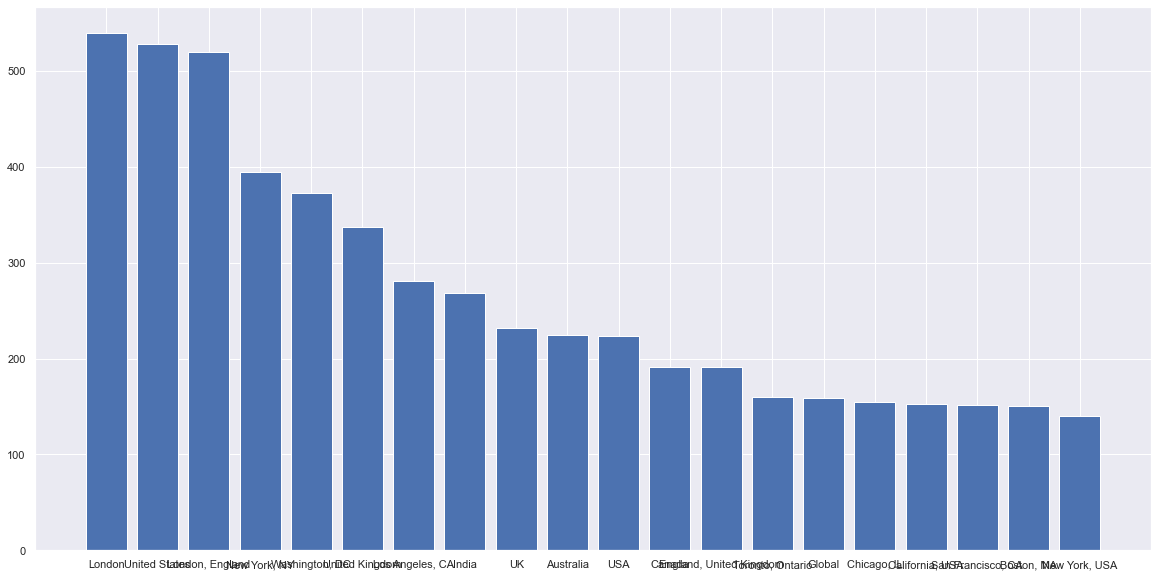

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(most_common_locations_name,most_common_locations_count)

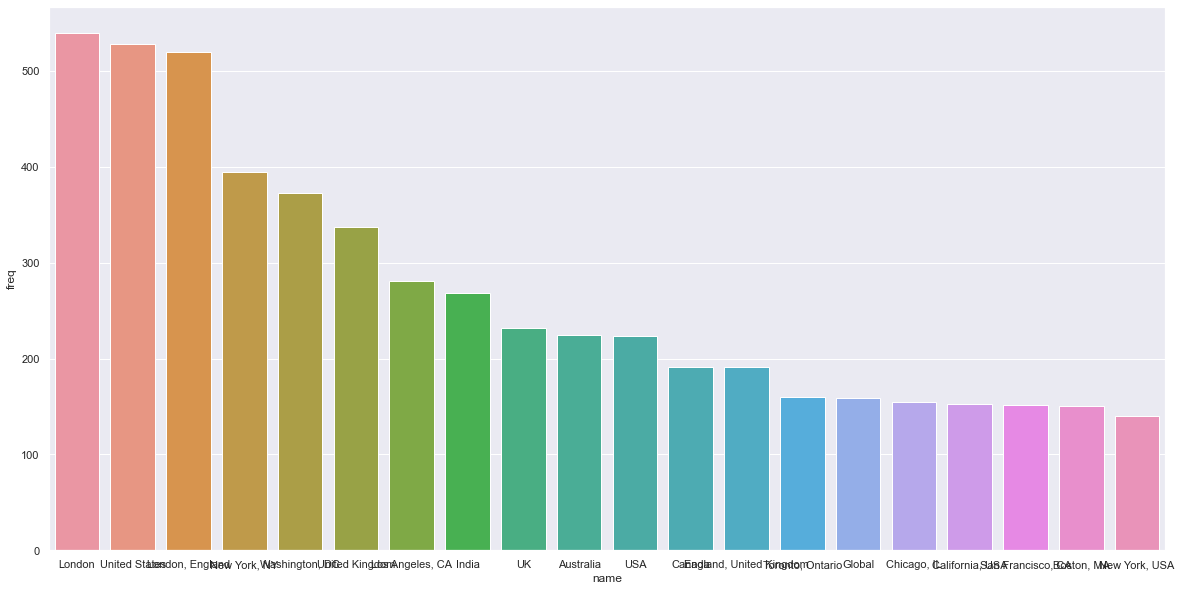

In [228]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="name", y="freq", data=raw_data, ci=False)